In [1024]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1025]:
df = pd.read_csv("test_scores.csv")

In [1026]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0



    Nous pouvons voir que les variables sont:
    - school
    - school_setting
    - school_type
    - classroom
    - teaching_method
    - n_student
    - student_id
    - gender
    - lunch
    - pretest
    - posttest


la variable student_id n'influe pas dans le potest. Nous pouvons donc la supprimer.

In [1027]:
del df["student_id"]

Nous avons une data base de 2133x11

In [1028]:
df.shape

(2133, 10)

In [1029]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [1030]:
df.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [1031]:
df.nunique()

school             23
school_setting      3
school_type         2
classroom          97
teaching_method     2
n_student          18
gender              2
lunch               2
pretest            69
posttest           68
dtype: int64

In [1032]:
df["school_type"].unique()

array(['Non-public', 'Public'], dtype=object)

Répartition des femmes et des hommes dans notre jeu de donnée.

In [1033]:
femme = df[df['gender'] == "Female"]
mean_femal = femme["posttest"].mean()

homme = df[df['gender'] == "Male"]
mean_men = homme["posttest"].mean()

mean_femal, mean_men

(67.00473484848484, 67.19777158774373)

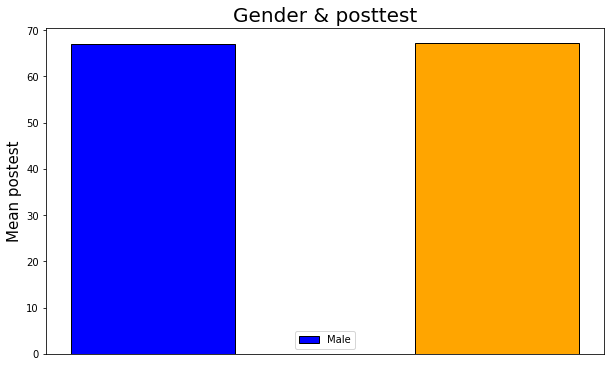

In [1034]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,6))

width=10

plt.bar(len(femme), mean_femal, width, color="b", edgecolor='black')
plt.bar(len(homme), mean_men, width, color="orange", edgecolor='black')

ax.get_xaxis().set_visible(False)

ax.set_title('Gender & posttest', size=20)
ax.set_xlabel('Gender', size=15)
ax.set_ylabel('Mean postest', size=15)

ax.legend(['Male'])

plt.show()

In [1035]:
df = pd.get_dummies(df, drop_first=False)

In [1036]:
labels_school = [k for k, v in df.head().items() if k.find("teaching_method") >= 0]
#print(labels_school)
school_test_score = {label: df[df[label] == 1]["posttest"].mean() for label in labels_school}
print(school_test_score)

{'teaching_method_Experimental': 72.9828947368421, 'teaching_method_Standard': 63.84705025491624}


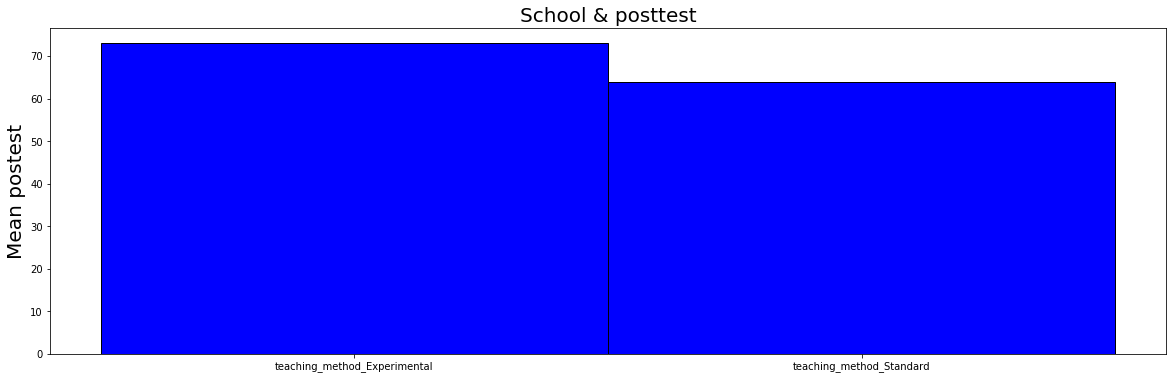

In [1037]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,6))

width=10

recuperate_label = lambda data: [i for i in data]

X = [k for k, v in school_test_score.items()]
Y = [i for i in school_test_score.values()]

width = 1.0
plt.bar(X, Y, width, color='b', edgecolor='black')

ax.set_title('School & posttest', size=20)
ax.set_ylabel('Mean postest', size=20)

plt.show()

In [1038]:
df["n_student"].unique()

array([20., 21., 18., 15., 16., 19., 17., 28., 27., 24., 14., 22., 23.,
       31., 25., 26., 29., 30.])

[20. 21. 18. 15. 16. 19. 17. 28. 27. 24. 14. 22. 23. 31. 25. 26. 29. 30.]


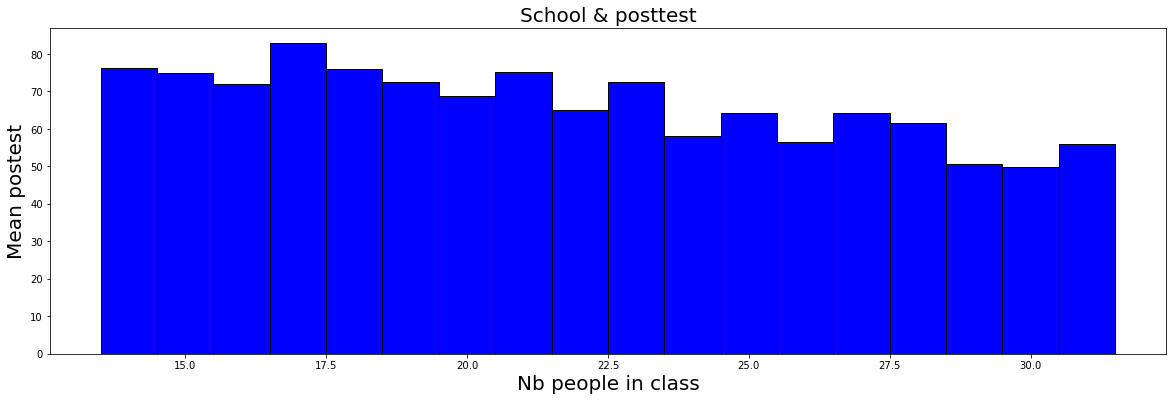

In [1039]:
labels_school = df["n_student"].unique()
print(labels_school)

school_test_score = {label: df[df["n_student"] == label]["posttest"].mean() for label in labels_school}


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,6))

width=10

recuperate_label = lambda data: [i for i in data]

X = [k for k, v in school_test_score.items()]
Y = [i for i in school_test_score.values()]

width = 1.0
plt.bar(X, Y, width, color='b', edgecolor='black')

ax.set_title('School & posttest', size=20)
ax.set_ylabel('Mean postest', size=20)
ax.set_xlabel('Nb people in class', size=20)
plt.show()



{'lunch_Does not qualify': 74.37530864197531, 'lunch_Qualifies for reduced/free lunch': 57.4760348583878}


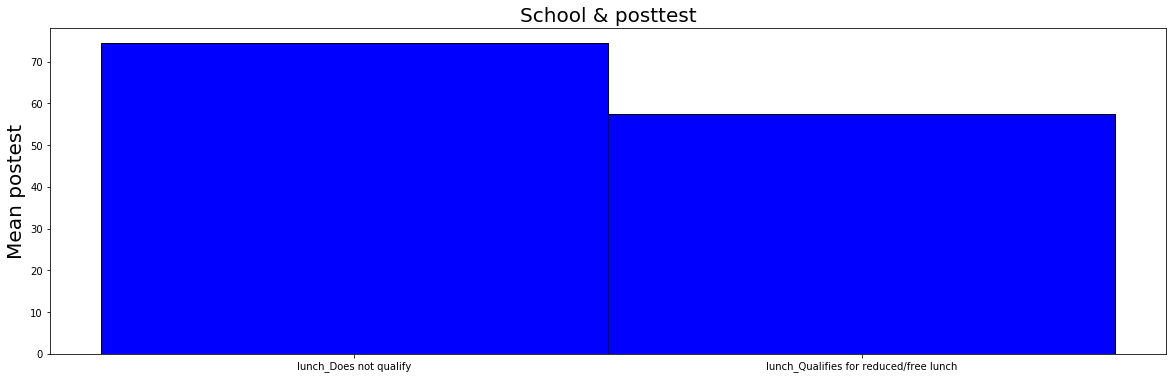

In [1040]:
labels_school = [k for k, v in df.head().items() if k.find("lunch") >= 0]
#print(labels_school)

school_test_score = {label: df[df[label] == 1]["posttest"].mean() for label in labels_school}
print(school_test_score)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,6))

width=10

recuperate_label = lambda data: [i for i in data]

X = [k for k, v in school_test_score.items()]
Y = [i for i in school_test_score.values()]

width = 1.0
plt.bar(X, Y, width, color='b', edgecolor='black')

ax.set_title('School & posttest', size=20)
ax.set_ylabel('Mean postest', size=20)

plt.show()


[22.0, 23.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 93.0]


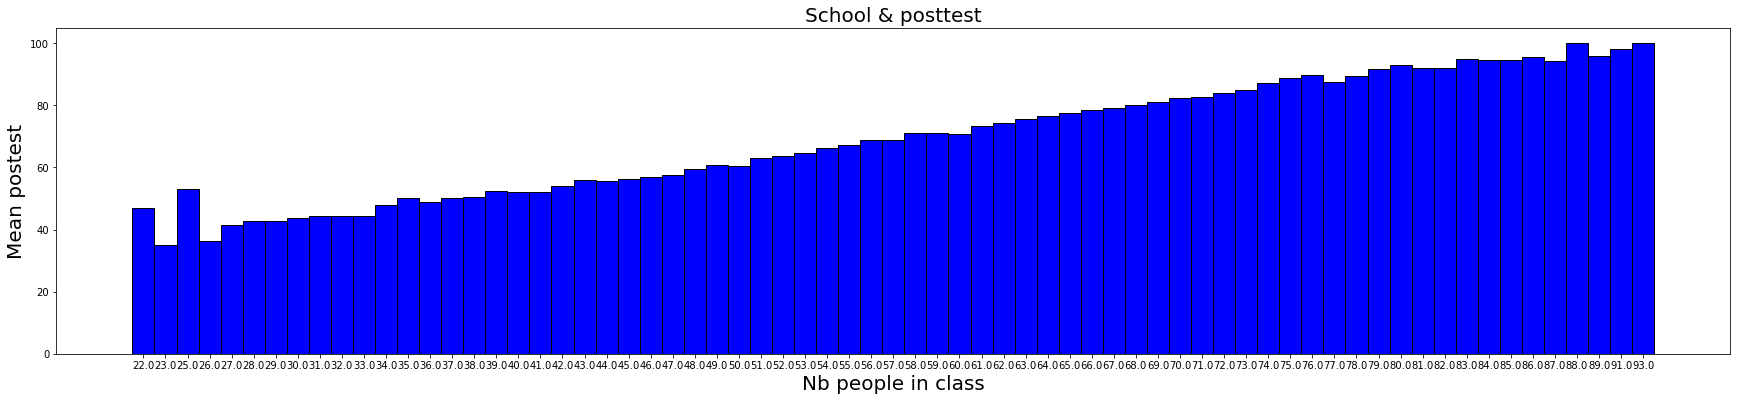

In [1041]:
labels_school = sorted(df["pretest"].unique())
print(labels_school)

school_test_score = {label: df[df["pretest"] == label]["posttest"].mean() for label in labels_school}

labels_school = dict(sorted(school_test_score.items(), key=lambda item: item[0]))

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,6))

width=10

recuperate_label = lambda data: [i for i in data]

X = [str(k) for k, v in school_test_score.items()]
Y = [i for i in school_test_score.values()]

width = 1.0
plt.bar(X, Y, width, color='b', edgecolor='black')

ax.set_title('School & posttest', size=20)
ax.set_ylabel('Mean postest', size=20)
ax.set_xlabel('Nb people in class', size=20)

plt.show()


In [1042]:
labels_school = [k for k, v in df.head().items() if k.find("school_setting") >= 0]
#print(labels_school)

In [1043]:
school_test_score = {label: df[df[label] == 1]["posttest"].mean() for label in labels_school}
print(school_test_score)

{'school_setting_Rural': 64.05098039215686, 'school_setting_Suburban': 76.0376569037657, 'school_setting_Urban': 61.74834437086093}


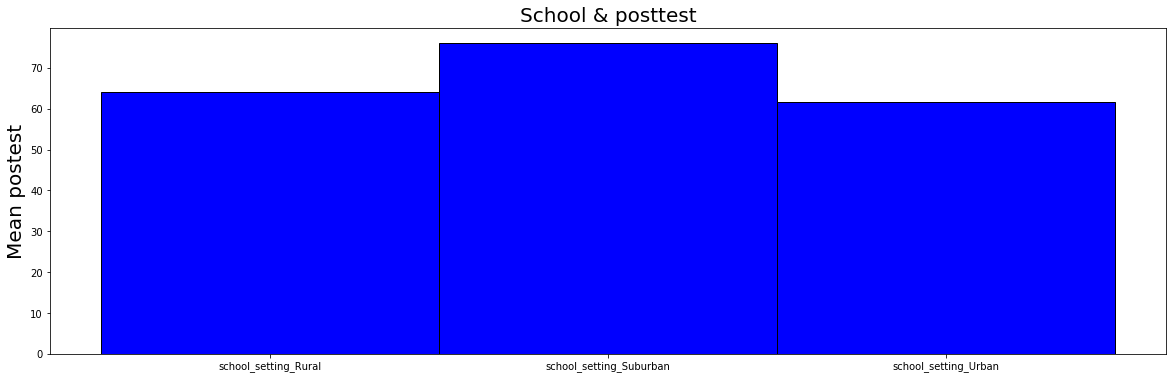

In [1044]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,6))

width=10

recuperate_label = lambda data: [i for i in data]

X = [k for k, v in school_test_score.items()]
Y = [i for i in school_test_score.values()]

width = 1.0
plt.bar(X, Y, width, color='b', edgecolor='black')

ax.set_title('School & posttest', size=20)
ax.set_ylabel('Mean postest', size=20)

plt.show()

In [1045]:
labels_school = [k for k, v in df.head().items() if k.find("school") >= 0 and k.count("_") < 2]
#print(labels_school)

In [1046]:
school_test_score = {label: df[df[label] == 1]["posttest"].mean() for label in labels_school}
#print(school_test_score)

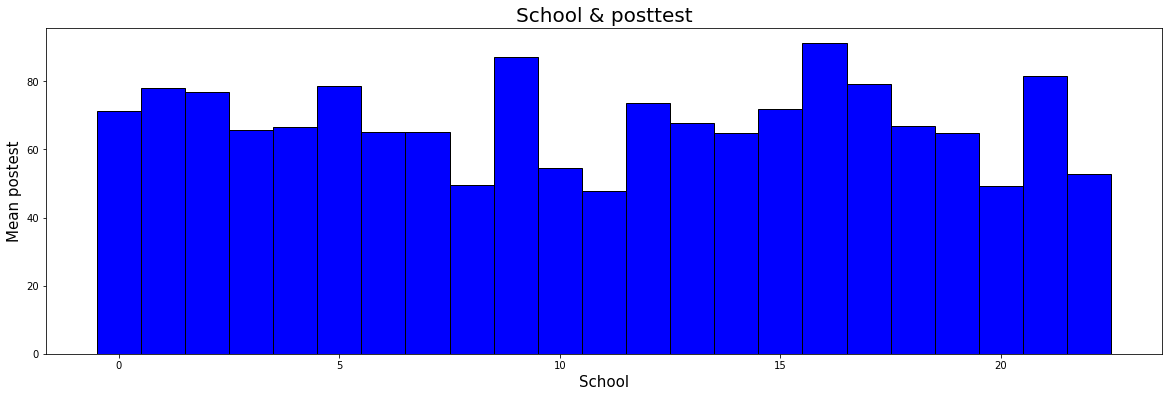

In [1047]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,6))

width=10

recuperate_label = lambda data: [i for i in data]

X = [n for n in range(len(school_test_score))]
Y = [i for i in school_test_score.values()]

width = 1.0
plt.bar(X, Y, width, color='b', edgecolor='black')

ax.set_title('School & posttest', size=20)
ax.set_xlabel('School', size=15)
ax.set_ylabel('Mean postest', size=15)

plt.show()

In [1048]:
print({nb: i for nb, i in enumerate(labels_school)})

{0: 'school_ANKYI', 1: 'school_CCAAW', 2: 'school_CIMBB', 3: 'school_CUQAM', 4: 'school_DNQDD', 5: 'school_FBUMG', 6: 'school_GJJHK', 7: 'school_GOKXL', 8: 'school_GOOBU', 9: 'school_IDGFP', 10: 'school_KFZMY', 11: 'school_KZKKE', 12: 'school_LAYPA', 13: 'school_OJOBU', 14: 'school_QOQTS', 15: 'school_UAGPU', 16: 'school_UKPGS', 17: 'school_UUUQX', 18: 'school_VHDHF', 19: 'school_VKWQH', 20: 'school_VVTVA', 21: 'school_ZMNYA', 22: 'school_ZOWMK'}


In [1049]:
labels_school_type = [k for k, v in df.head().items() if k.find("school_type") >= 0]
print(labels_school_type)

['school_type_Non-public', 'school_type_Public']


In [1050]:
school_test_score = {label: df[df[label] == 1]["posttest"].mean() for label in labels_school_type}
print(school_test_score)

{'school_type_Non-public': 75.96188747731398, 'school_type_Public': 64.01643489254108}


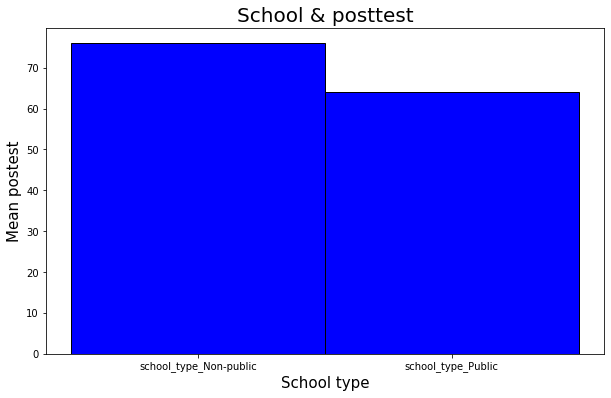

In [1051]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,6))

width=10

recuperate_label = lambda data: [i for i in data]

X = [k for k, v in school_test_score.items()]
Y = [i for i in school_test_score.values()]

width = 1.0
plt.bar(X, Y, width, color='b', edgecolor='black')

ax.set_title('School & posttest', size=20)
ax.set_xlabel('School type', size=15)
ax.set_ylabel('Mean postest', size=15)

plt.show()

In [1052]:
df.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,20.0,66.0,79.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,20.0,64.0,76.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,20.0,61.0,77.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,20.0,64.0,76.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


Il y a beaucoup de corrélation. Sauf pour le genre.

In [1053]:
del df["gender_Female"]
del df["gender_Male"]

In [1072]:
Y = df["posttest"]

In [1055]:
X = df.drop("posttest", axis=1)

In [1056]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [1057]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [1058]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1059]:
model.score(X_train, y_train)

0.9623577049497088

In [1060]:
model.score(X_test, y_test)

0.9574352165696691

In [1061]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [1062]:
lasso_reg.score(X_train, y_train)

0.9227267217918536

In [1063]:
lasso_reg.score(X_test, y_test)

0.9270361857593599

In [1064]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [1065]:
ridge_reg.score(X_train, y_train)

0.9617524959285128

In [1066]:
ridge_reg.score(X_test, y_test)

0.9570171418566119

In [1067]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [1068]:
regr = ElasticNet(random_state=10)
regr.fit(X_train, y_train)

ElasticNet(random_state=10)

In [1069]:
regr.score(X_train, y_train)

0.9253188830217853

In [1070]:
regr.score(X_test, y_test)

0.9293309337628993

In [972]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [973]:
clf = svm.SVR(kernel="linear", C=1)
clf.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [974]:
clf.score(X_train, y_train)

0.9591591496870108

In [975]:
clf.score(X_test, y_test)

0.9514470661512768

In [976]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
clf = RandomForestRegressor(max_depth=20, random_state=100)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=100)

In [977]:
clf.score(X_train, y_train)

0.9808321544150493

In [978]:
clf.score(X_test, y_test)

0.943152010871202

Pour améliorer:

    - grid search
    
    
Pour valider:

    - Cross validation
